In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [4]:
import warnings

In [5]:
import pickle

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
train_data.shape

(7613, 5)

In [10]:
test_data.shape

(3263, 4)

In [11]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
train_data['target'].value_counts().to_frame()

,target
0,4342
1,3271


<AxesSubplot:ylabel='target'>

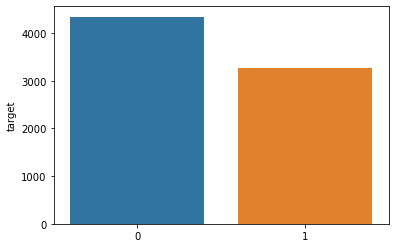

In [14]:
sns.barplot(data=train_data['target'].value_counts().to_frame(),x=train_data['target'].value_counts().to_frame().index,y ="target",)

In [15]:
train_data[train_data.target==1].text.sample(5).to_frame()

,text
7048,A GPM satellite 'bullseye' in Typhoon Soudelor...
6413,#?? #?? #??? #??? Suicide bomber kills 15 in S...
6627,Cross-border terrorism: Pakistan caught red-ha...
4534,Check this @SuryaRay Udhampur terror attack: M...
2222,Perhaps 'historic' should be applied not to th...


In [16]:
train_data[train_data.target==0].text.sample(5).to_frame()

,text
6136,WHELEN MODEL 295SS-100 SIREN AMPLIFIER POLICE ...
6507,Ended today's staff meeting with the teacher v...
4155,How standardized tests harm children of color ...
7103,Jupiter's Great Red Spot is a violent storm la...
4342,@welshninja87 click on the tag there's lots of...


In [17]:
train_data["keyword"].value_counts()[:20].to_frame()

,keyword
fatalities,45
deluge,42
armageddon,42
body%20bags,41
damage,41
harm,41
sinking,41
evacuate,40
fear,40
collided,40


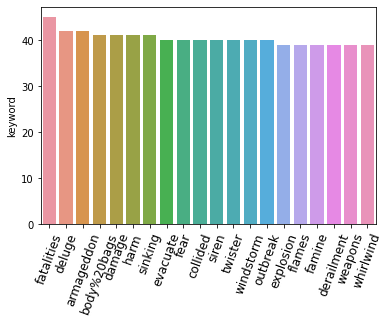

<Figure size 1080x432 with 0 Axes>

In [18]:
sns.barplot(data=train_data["keyword"].value_counts()[:20].to_frame(),x=train_data["keyword"].value_counts()[:20].to_frame().index,y ="keyword",)
plt.xticks(rotation=70,size=12);
fig=plt.figure(figsize=(15,6))


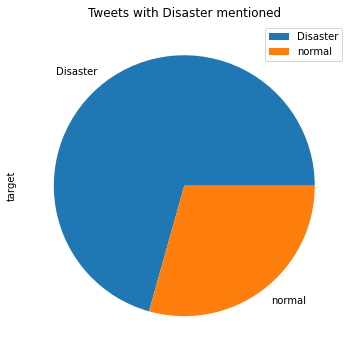

In [19]:
train_data[train_data.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

In [20]:
train_data["location"].value_counts()[:10].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


In [21]:
train_data.text = train_data.text.apply(lambda x:x.lower())

In [22]:
test_data.text = test_data.text.apply(lambda x:x.lower())

In [23]:
train_data.text

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [24]:
test_data.text

0                      just happened a terrible car crash
1       heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                apocalypse lighting. #spokane #wildfires
4           typhoon soudelor kills 28 in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane. my city...
3260    green line derailment in chicago http://t.co/u...
3261    meg issues hazardous weather outlook (hwo) htt...
3262    #cityofcalgary has activated its municipal eme...
Name: text, Length: 3263, dtype: object

In [25]:
train_data.text=train_data.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
train_data.text=train_data.text.apply(lambda x:re.sub('<.*?>+', '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('<.*?>+', '', x) )

In [26]:
train_data.text=train_data.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )

In [27]:
train_data.text=train_data.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
train_data.text=train_data.text.apply(lambda x:re.sub('\n' , '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('\n', '', x) )

In [28]:
train_data.text=train_data.text.apply(lambda x:re.sub('\w*\d\w*' , '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('\w*\d\w*', '', x) )

In [29]:
train_data.text


0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3        people receive wildfires evacuation orders in...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    ariaahrary thetawniest the out of control wild...
7610                                 s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [30]:
test_data.text

0                      just happened a terrible car crash
1       heard about earthquake is different cities sta...
2       there is a forest fire at spot pond geese are ...
3                   apocalypse lighting spokane wildfires
4             typhoon soudelor kills  in china and taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm in ri worse than last hurricane my  hard...
3260                    green line derailment in chicago 
3261            meg issues hazardous weather outlook hwo 
3262    cityofcalgary has activated its municipal emer...
Name: text, Length: 3263, dtype: object

In [31]:
disaster_tweets= train_data[train_data['target']==1]['text'] 

In [32]:
non_disaster_tweets= train_data[train_data['target']==0]['text'] 


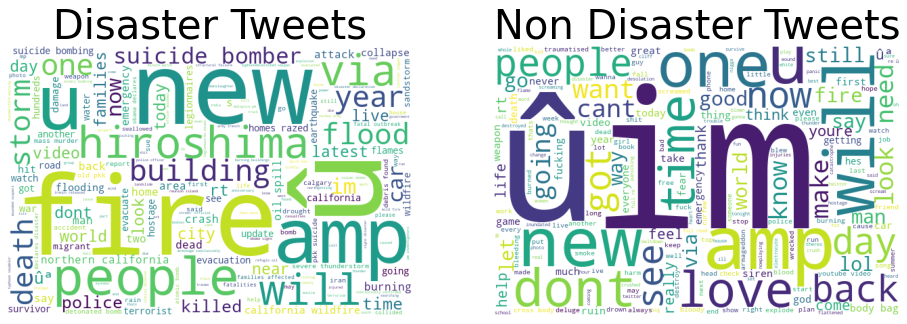

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

In [35]:
token=nltk.tokenize.RegexpTokenizer(r'\w+')

In [36]:
train_data.text=train_data.text.apply(lambda x:token.tokenize(x))
test_data.text=test_data.text.apply(lambda x:token.tokenize(x))

In [37]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, a, bridge, colla...",1
7609,10870,NaN,NaN,"[ariaahrary, thetawniest, the, out, of, contro...",1
7610,10871,NaN,NaN,"[s, of, volcano, hawaii]",1
7611,10872,NaN,NaN,"[police, investigating, after, an, ebike, coll...",1


In [38]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,"[just, happened, a, terrible, car, crash]"
1,2,NaN,NaN,"[heard, about, earthquake, is, different, citi..."
2,3,NaN,NaN,"[there, is, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,"[typhoon, soudelor, kills, in, china, and, tai..."
...,...,...,...,...
3258,10861,NaN,NaN,"[earthquake, safety, los, angeles, ûò, safety,..."
3259,10865,NaN,NaN,"[storm, in, ri, worse, than, last, hurricane, ..."
3260,10868,NaN,NaN,"[green, line, derailment, in, chicago]"
3261,10874,NaN,NaN,"[meg, issues, hazardous, weather, outlook, hwo]"


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Tejashaarav
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
train_data.text=train_data.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test_data.text=test_data.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])

In [50]:
stemmer = nltk.stem.PorterStemmer()

In [51]:
train_data.text = train_data.text.apply(lambda x: " ".join(stemmer.stem(token)for token in x))

In [52]:
test_data.text = test_data.text.apply(lambda x: " ".join(stemmer.stem(token)for token in x))

In [53]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,10870,NaN,NaN,ariaahrari thetawniest control wild fire calif...,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,polic investig ebik collid car littl portug eb...,1


In [54]:
test_data


,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquak safeti lo angel ûò safeti fasten xrwn
3259,10865,NaN,NaN,storm ri wors last hurrican hardest hit yard l...
3260,10868,NaN,NaN,green line derail chicago
3261,10874,NaN,NaN,meg issu hazard weather outlook hwo


In [55]:
count_vectorizer = CountVectorizer()

In [56]:
train_data_countvectors = count_vectorizer.fit_transform(train_data['text'])

In [57]:
test_data_countvectors = count_vectorizer.fit_transform(test_data['text'])

In [58]:
train_data_countvectors

<7613x13407 sparse matrix of type '<class 'numpy.int64'>'
	with 65639 stored elements in Compressed Sparse Row format>

In [59]:
test_data_countvectors

<3263x8109 sparse matrix of type '<class 'numpy.int64'>'
	with 28413 stored elements in Compressed Sparse Row format>

In [62]:
lr = LogisticRegression(C=2)
scores_lr = cross_val_score(lr, train_data_countvectors, train_data["target"], cv=6, scoring="f1")

In [63]:
scores_lr

array([0.64069264, 0.53245532, 0.59334566, 0.49111808, 0.59638554,
       0.7183908 ])

In [66]:
NB_Vec = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_nb = cross_val_score(NB_Vec, train_data_countvectors, train_data["target"], cv=cv, scoring="f1")

In [67]:
scores_nb

array([0.77127244, 0.75604053, 0.74760383, 0.74822415, 0.76228209,
       0.75396825, 0.75545171, 0.75917065, 0.75851148, 0.75409836,
       0.74584323, 0.74451411, 0.76682316, 0.75911252, 0.75862069])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
rfc = RandomForestClassifier()
scores_rfc = cross_val_score(rfc, train_data_countvectors, train_data["target"], cv=6, scoring="f1")
scores_rfc

array([0.59737157, 0.49215686, 0.5       , 0.44421272, 0.51260504,
       0.687251  ])

In [73]:
svc = SVC()
scores_svc = cross_val_score(svc, train_data_countvectors, train_data["target"], cv=6, scoring="f1")
scores_svc

array([0.60097324, 0.50367261, 0.57749469, 0.44864227, 0.59148446,
       0.68891281])

In [75]:
dct = DecisionTreeClassifier()
scores_dct = cross_val_score(dct, train_data_countvectors, train_data["target"], cv=6, scoring="f1")
scores_dct

array([0.50351288, 0.48172446, 0.44465116, 0.47174888, 0.47444552,
       0.65339367])

In [76]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, train_data_countvectors, train_data["target"], cv=6, scoring="f1")
scores_knn

array([0.18064516, 0.21133231, 0.09195402, 0.14849921, 0.21779141,
       0.23717949])

In [77]:
#multinomial naive bayes theorem has the best f1 score so it is the most effective method to run this ML model